# Unsupervised Machine Learning
### Unsupervised learning example: Iris dimensionality reduction

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

Loading our usual libraries:

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Pretty as disp
hint = 'https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/docs/hints/'  # path to hints on GitHub
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(10,8)})  # Figure size

In [3]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)  # features matrix
y_iris = iris['species']  # target vector
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Following the sequence of steps outlined earlier, we have:

In [4]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)              # 2. Instantiate the model with the number of components we want (2 here)
pca.fit(X_iris)                        # 3. Fit to data. Notice y is not specified!
X_2D = pca.transform(X_iris)           # 4. Transform the data

In [5]:
# Checking out the first few row of transformed data
X_2D[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [6]:
print('\nX_2D type:', type(X_2D))
print('Shape:', X_2D.shape)


X_2D type: <class 'numpy.ndarray'>
Shape: (150, 2)


Now let's plot the results. A quick way to do this is to insert the results into the original Iris ``DataFrame``, and use Seaborn's ``lmplot`` to show the results:

In [7]:
iris['PC1'] = X_2D[:, 0]
iris['PC2'] = X_2D[:, 1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


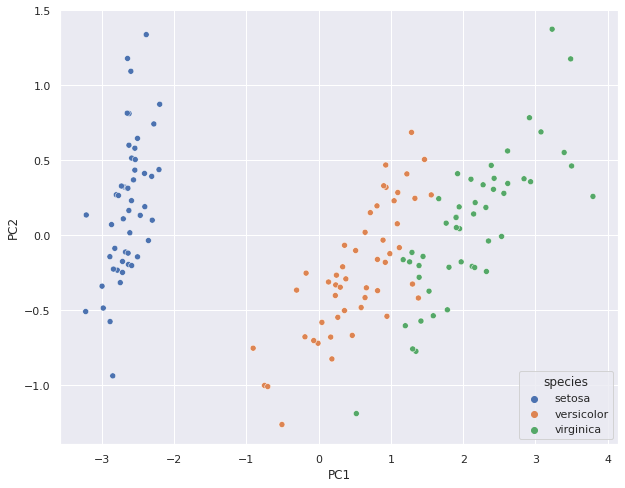

In [30]:
sns.scatterplot(data=iris, x="PC1", y="PC2", hue="species");

We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before.

In [9]:
# What amount of variance does each PC explain?
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [10]:
# the most important features:
print(abs( pca.components_ ))

[[0.36138659 0.08452251 0.85667061 0.3582892 ]
 [0.65658877 0.73016143 0.17337266 0.07548102]]


### Unsupervised learning: Iris clustering with *k*-means

Let's next look at applying clustering to the Iris data.
A clustering algorithm attempts to find distinct groups of data without reference to any labels.
Here we will use a simple clustering method called a _k_-means clustering (*k*-means).

The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.


<img src="https://github.com/soltaniehha/Business-Analytics/blob/master/figs/K-Means.png?raw=true" width="600" align="center"/>



We can fit the k-means model as follows:

In [25]:
from sklearn.cluster import KMeans  # 1. Choose the model class
kmeans = KMeans(n_clusters=3, 
                random_state=878)   # 2. Instantiate the model with hyperparameters
kmeans.fit(X_iris)                  # 3. Fit to data. Notice y is not specified!
y_kmeans = kmeans.predict(X_iris)   # 4. Assigning clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
iris['cluster'] = y_kmeans
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PC1,PC2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1


In [28]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

We can transform the cluster centers using our PCA model:

In [14]:
centers = pca.transform(kmeans.cluster_centers_)
centers

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 2.37446608,  0.26311694],
       [-2.64241546,  0.19088505],
       [ 0.67566229, -0.31520477]])

By splitting the data by cluster number, we see exactly how well the _k_-means algorithm has recovered the underlying label: the *setosa* species is separated perfectly within cluster 1, while there remains a small amount of mixing between *versicolor* and *virginica*.
This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could *automatically* identify the presence of these different groups of species with a simple clustering algorithm!
This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

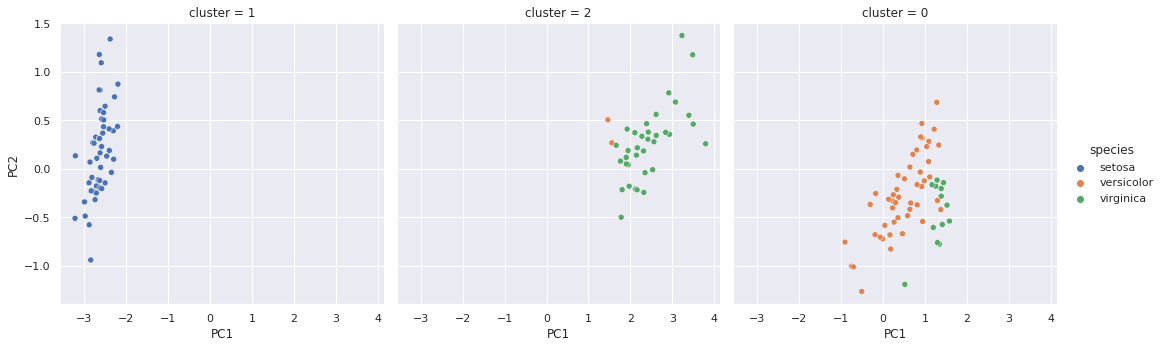

In [32]:
sns.relplot(x="PC1", y="PC2", data=iris, hue='species', col='cluster', col_order=[1,2,0]);

We will also plot the cluster centers as determined by the k-means estimator (and after transforming them to the appropriate PCA dimensions) by diamond signs:

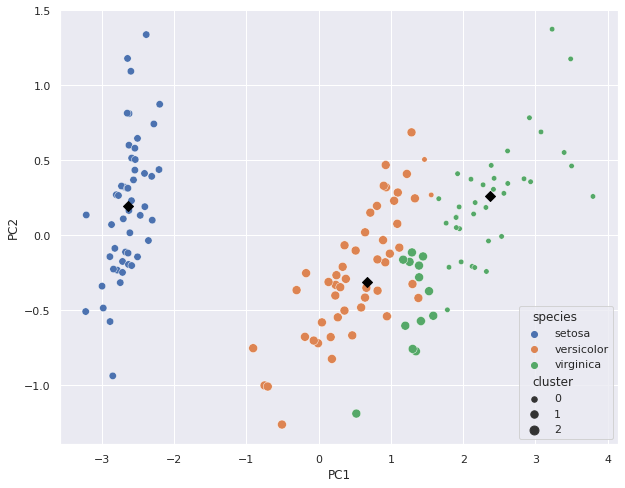

In [20]:
sns.scatterplot(x="PC1", y="PC2", data=iris, hue='species', size='cluster', sizes=(30,80));

plt.scatter(centers[:, 0], centers[:, 1], color='black', s=50, marker='D');

The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. 

# Your turn

Going back to the "tips" dataset, let's use *k*-means algorithm to divid the customers into clusters. 

First, let's load the data:

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Then add two new columns to this dataset: 1) tip percent 2) bill paid per person

In [22]:
tips['tip_percent'] = tips['tip'] / tips['total_bill']
tips['bill_per_person'] = tips['total_bill'] / tips['size']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent,bill_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,11.840000
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,6.147500


Using `pairplot` function plot the panel of charts to reveal relationships between variables:

In [ ]:
# Your answer goes here


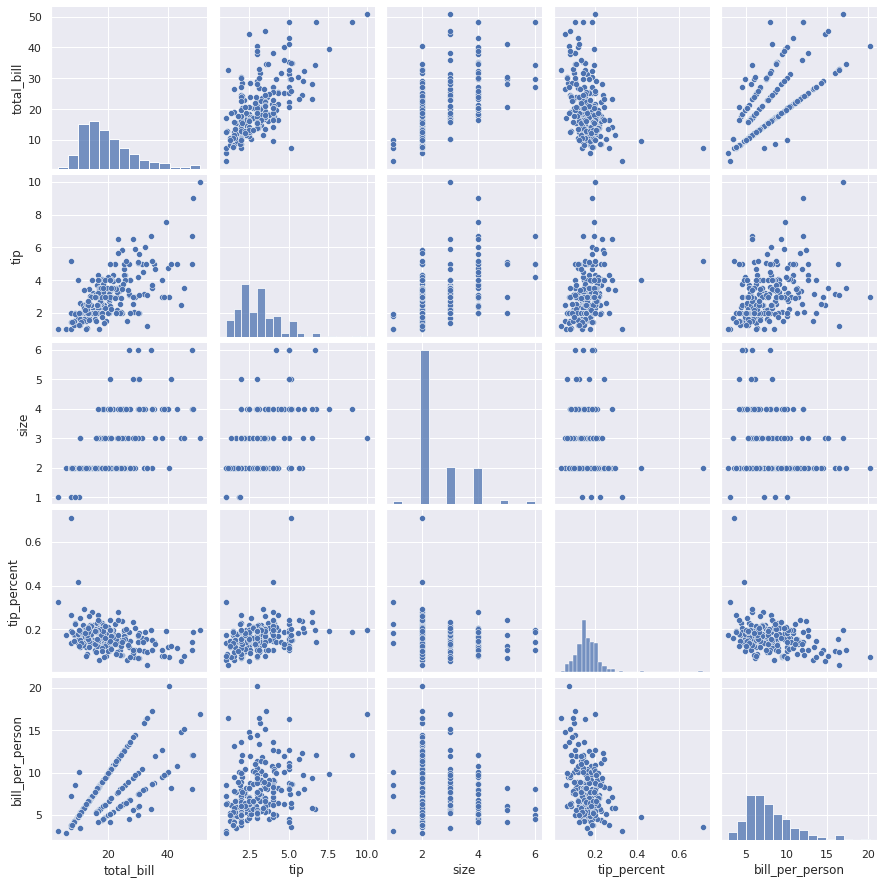

In [23]:
# Don't run this cell to keep the outcome as your frame of reference

In [33]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-pairplot')

Create `X_tips` DataFrame, a subset of "tips" that every thing but the following columns: ['sex', 'smoker', 'day', 'time']

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-xtips')

In [ ]:
X_tips.head()

In [ ]:
X_tips.shape

Create a `KMeans` model (call it `kmeans`), set the number of clusters to 2 and train/fit it using the entire `X_tips`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-kmeans')

Make predictions by using `predict()` method on the model we just trained to generate cluster labels for each data point. Save these values to `y_kmeans`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-predict')

Make `y_kmeans` a new column of `X_tips` with the name "cluster":

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-outcome')

Now that we have a cluster number for each of the datapoints let's visualize our clustering outcome.

Plot the following `pairplot`:

In [ ]:
# Your answer goes here


In [ ]:
# SOLUTION: Uncomment and execute the cell below to get help
#disp(hint + '12-01-pairplot2')

* Try different number of clusters and see how these charts change. Which one is your favorite?